In [3]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
import os



In [4]:
from src.random_hamiltonian import random_unitary
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

from src import measurements as measure, density_matrix as DM

import time

In [5]:
def messenger_order_8(trial_index):
    orders1=[[0,1,2,3,4,5,6,7]]
    orders2= [[0,1,2,4,3,5,6,7]]
    if trial_index%2 ==0:
        return lambda: rng.choice(orders1)
    else:
         return lambda: rng.choice(orders2)



In [8]:
orders1=[[0,1,2,3,4,5,6,7]]
orders2= [[0,1,2,4,3,5,6,7]]

In [58]:
num_blocks = 2
block_size =4
sub_system_unitaries = [random_unitary(block_size) for _ in range(num_blocks)]
U = DM.tensor(sub_system_unitaries)

In [59]:
def run_n_trials_mess(qm_sys: DM.DensityMatrix, num_blocks: int, measurment_set, num_trials: int, orders1,orders2):
    
    if type(measurment_set) != list:
        measurment_set = [measurment_set]
        
    
    
    start = time.time()
    N = qm_sys.number_of_qbits
    
    
    measurments = [np.array(measurment(qm_sys)) for measurment in measurment_set]

    assert N % num_blocks == 0, f"num_block = {num_blocks} must divide the size of the system {N}"
    block_size = N // num_blocks
    
    for i in range(num_trials):
        

        if num_trials%2==0:
            order=[[0,1,2,3,4,5,6,7]]
        else:
            order = [[0,1,2,4,3,5,6,7]]
            
        U.relabel_basis(order)
        U.change_to_energy_basis()

        qm_sys = U * qm_sys * U.H

        
        measurments = [np.vstack((measurments[i], measurment(qm_sys)))  for i,measurment in enumerate(measurment_set)]
    print(f"{np.round(time.time() - start, 2)} seconds elapsed")
    return measurments

In [25]:
def save_data(data:np.ndarray, num_qbits:str,measurment:str,num_chunks:str,connectivity_type:str,run_index:str,sim_index = int,extra = ""):
    index = 0
    if extra != "":
        path = f"../data/num_qbits={num_qbits}_num_chunks={num_chunks}_connectivity_type={connectivity_type}_other={extra}_index={sim_index}"
    else:
        path = f"../data/num_qbits={num_qbits}_num_chunks={num_chunks}_connectivity_type={connectivity_type}_index={sim_index}"
    if not os.path.exists(path):
        os.mkdir(path)
    file_name = path+f"/{measurment}_{run_index}.dat"
    np.savetxt(file_name,data,header=f"{measurment} for {num_qbits} qbits with connectivity {connectivity_type} in chunks {num_chunks}")

In [60]:
N =8
trial_index_total = 100
num_chunks = 2
for index in range(1):
    print(f"working on the {index}th run")
    pops = [.2 for _ in range(8)]
    pops[5] = .4
    
    my_sys = DM.n_thermal_qbits(pops)
    my_sys.change_to_energy_basis()
    results = run_n_trials_mess(my_sys,num_chunks,[measure.pops,measure.extractable_work_of_each_qubit],100,orders1,orders2)
    save_data(results[0], N, "pops" ,num_chunks,"mess_with_same_uni",index,0)
    save_data(results[1], N, "extractable_work",num_chunks,"mess_with_same_uni",index,0)

working on the 0th run
11.57 seconds elapsed


In [50]:
N =8
trial_index_total = 100
num_chunks = 2
for index in range(100):
    print(f"working on the {index}th run")
    pops = [.2 for _ in range(8)]
    pops[5] = .4
    
    my_sys = DM.n_thermal_qbits(pops)
    my_sys.change_to_energy_basis()
    results = run_n_trials_mess(my_sys,num_chunks,[measure.pops,measure.extractable_work_of_each_qubit],500,orders1,orders2)
    save_data(results[0], N, "pops" ,num_chunks,"mess",index,1)
    save_data(results[1], N, "extractable_work",num_chunks,"mess",index,1)

working on the 0th run
58.46 seconds elapsed
working on the 1th run
58.21 seconds elapsed
working on the 2th run
58.2 seconds elapsed
working on the 3th run
58.09 seconds elapsed
working on the 4th run
58.14 seconds elapsed
working on the 5th run
58.58 seconds elapsed
working on the 6th run
58.26 seconds elapsed
working on the 7th run
58.05 seconds elapsed
working on the 8th run
58.29 seconds elapsed
working on the 9th run
58.3 seconds elapsed
working on the 10th run
58.65 seconds elapsed
working on the 11th run
58.19 seconds elapsed
working on the 12th run
58.2 seconds elapsed
working on the 13th run
58.32 seconds elapsed
working on the 14th run
58.04 seconds elapsed
working on the 15th run
58.27 seconds elapsed
working on the 16th run
57.94 seconds elapsed
working on the 17th run
57.89 seconds elapsed
working on the 18th run
58.3 seconds elapsed
working on the 19th run
58.15 seconds elapsed
working on the 20th run
58.27 seconds elapsed
working on the 21th run
58.13 seconds elapsed
wo

In [51]:
N =8
trial_index_total = 100
num_chunks = 2
for index in range(100):
    print(f"working on the {index}th run")
    pops = [.2 for _ in range(8)]
    pops[5] = .4
    
    my_sys = DM.n_thermal_qbits(pops)
    my_sys.change_to_energy_basis()
    results = run_n_trials_mess(my_sys,num_chunks,[measure.pops,measure.extractable_work_of_each_qubit],500,orders1,orders2)
    save_data(results[0], N, "pops" ,num_chunks,"mess",index,2)
    save_data(results[1], N, "extractable_work",num_chunks,"mess",index,2)

working on the 0th run
59.88 seconds elapsed
working on the 1th run
59.8 seconds elapsed
working on the 2th run
59.91 seconds elapsed
working on the 3th run
59.87 seconds elapsed
working on the 4th run
59.75 seconds elapsed
working on the 5th run
59.85 seconds elapsed
working on the 6th run
59.98 seconds elapsed
working on the 7th run
59.86 seconds elapsed
working on the 8th run
59.88 seconds elapsed
working on the 9th run
59.78 seconds elapsed
working on the 10th run
59.93 seconds elapsed
working on the 11th run
59.83 seconds elapsed
working on the 12th run
59.8 seconds elapsed
working on the 13th run
59.87 seconds elapsed
working on the 14th run
59.86 seconds elapsed
working on the 15th run
59.82 seconds elapsed
working on the 16th run
60.16 seconds elapsed
working on the 17th run
59.82 seconds elapsed
working on the 18th run
59.85 seconds elapsed
working on the 19th run
59.75 seconds elapsed
working on the 20th run
59.78 seconds elapsed
working on the 21th run
59.95 seconds elapsed


In [52]:
N =8
trial_index_total = 100
num_chunks = 2
for index in range(100):
    print(f"working on the {index}th run")
    pops = [.2 for _ in range(8)]
    pops[5] = .4
    
    my_sys = DM.n_thermal_qbits(pops)
    my_sys.change_to_energy_basis()
    results = run_n_trials_mess(my_sys,num_chunks,[measure.pops,measure.extractable_work_of_each_qubit],500,orders1,orders2)
    save_data(results[0], N, "pops" ,num_chunks,"mess",index,3)
    save_data(results[1], N, "extractable_work",num_chunks,"mess",index,3)

working on the 0th run
59.86 seconds elapsed
working on the 1th run
59.92 seconds elapsed
working on the 2th run
60.04 seconds elapsed
working on the 3th run
59.97 seconds elapsed
working on the 4th run
59.81 seconds elapsed
working on the 5th run
59.93 seconds elapsed
working on the 6th run
59.91 seconds elapsed
working on the 7th run
59.84 seconds elapsed
working on the 8th run
59.78 seconds elapsed
working on the 9th run
60.66 seconds elapsed
working on the 10th run
60.45 seconds elapsed
working on the 11th run
60.32 seconds elapsed
working on the 12th run
60.15 seconds elapsed
working on the 13th run
59.84 seconds elapsed
working on the 14th run
59.8 seconds elapsed
working on the 15th run
60.21 seconds elapsed
working on the 16th run
59.84 seconds elapsed
working on the 17th run
59.95 seconds elapsed
working on the 18th run
59.98 seconds elapsed
working on the 19th run
60.35 seconds elapsed
working on the 20th run
59.92 seconds elapsed
working on the 21th run
59.96 seconds elapsed

In [53]:
N =8
trial_index_total = 100
num_chunks = 2
for index in range(100):
    print(f"working on the {index}th run")
    pops = [.2 for _ in range(8)]
    pops[5] = .4
    
    my_sys = DM.n_thermal_qbits(pops)
    my_sys.change_to_energy_basis()
    results = run_n_trials_mess(my_sys,num_chunks,[measure.pops,measure.extractable_work_of_each_qubit],500,orders1,orders2)
    save_data(results[0], N, "pops" ,num_chunks,"mess",index,4)
    save_data(results[1], N, "extractable_work",num_chunks,"mess",index,4)

working on the 0th run
59.92 seconds elapsed
working on the 1th run
59.73 seconds elapsed
working on the 2th run
59.9 seconds elapsed
working on the 3th run
59.87 seconds elapsed
working on the 4th run
59.8 seconds elapsed
working on the 5th run
59.87 seconds elapsed
working on the 6th run
59.88 seconds elapsed
working on the 7th run
59.98 seconds elapsed
working on the 8th run
60.03 seconds elapsed
working on the 9th run
59.81 seconds elapsed
working on the 10th run
59.76 seconds elapsed
working on the 11th run
59.76 seconds elapsed
working on the 12th run
59.77 seconds elapsed
working on the 13th run
59.85 seconds elapsed
working on the 14th run
59.81 seconds elapsed
working on the 15th run
59.78 seconds elapsed
working on the 16th run
60.0 seconds elapsed
working on the 17th run
59.77 seconds elapsed
working on the 18th run
59.88 seconds elapsed
working on the 19th run
59.92 seconds elapsed
working on the 20th run
59.91 seconds elapsed
working on the 21th run
59.8 seconds elapsed
wo

In [35]:
def extractable_work_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    index = sim_index
    trial = trial_index
    file_name = '../data/num_qbits={}_num_chunks={}_connectivity_type={}_index={}/extractable_work_{}.dat'.format(num_qbits,num_chunks,connectivity_type,sim_index,trial_index)
    return np.genfromtxt(file_name,dtype=np.complex64)

In [36]:
#this gets the change in work between each time step
def change_in_work_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    return extractable_work_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type)[1:]-extractable_work_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type)[:-1]

#this finds where the change in work is greater than zero (a larger cutoff can be used here to find more significant changes)
def where_positive_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    return change_in_work_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type)>0

#this gets where the change in work is positive for the ith qubit in time ordered manner
def change_in_work_Q_i_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type,qubit_num):
    return change_in_work_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type).real[0:,qubit_num]>0

#find the number of positive changes
def num_positive_change(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    np.sum(where_positive_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type))
    print(num_positive_change(num_qbits,num_chunks,sim_index,trial_index,connectivity_type))

#find the percent of positive changes
def percent_of_positive_changes(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    return num_positive_change(num_qbits,num_chunks,sim_index,trial_index,connectivity_type)/(len(change_in_work(num_qbits,num_chunks,sim_index,trial_index,connectivity_type))*N)

#find the number of positive changes across landscape for initially cold qubits
def list_number_of_positive_for_initially_cold_qubits(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    list_val = [sum(x) for x in zip(*where_positive_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type))]
    del list_val[5]
    return list_val

#find the number of positive changes across landscape for initially hot qubits
def number_positive_changes_across_landscape_for_initially_hot(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    return np.sum(change_in_work_Q_i_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type,5))

In [44]:
all_intervals_on_landscape_connectivity(8,2,1,"mess")

[0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 4,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 4,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 4,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 4,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 3,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,


In [32]:
#gives a list of intervals for each qubit i where change in work is positive
def intervals_length_for_Q_i(num_qbits,num_chunks,sim_index,trial_index,connectivity_type,qubit_num):
    interval = [0]
    length = 0
    change_in_work_qubit = change_in_work_Q_i_trial(num_qbits,num_chunks,sim_index,trial_index,connectivity_type,qubit_num).tolist()
    change_in_work_qubit.append(0)
    for i in range(0,100):
        if change_in_work_qubit[i]==1:
            length = length +1
        else:
            interval.append(length)
            length = 0 
    return interval

#gives list of interval for which change in work is positive for the entire landscape
def all_intervals_on_landscape(num_qbits,num_chunks,sim_index,trial_index,connectivity_type):
    all_intervals_on_landscape = []
    for qubit_num in range (0,num_qbits):
        all_intervals_on_landscape = all_intervals_on_landscape + intervals_length_for_Q_i(num_qbits,num_chunks,sim_index,trial_index,connectivity_type,qubit_num)
    return all_intervals_on_landscape

def all_intervals_on_landscape_connectivity(num_qbits,num_chunks,num_of_sims,connectivity_type):
    all_interval_on_line = []
    for sim_index in range (0,num_of_sims):
        for trial_index in range (0,1):
            all_interval_on_line = all_interval_on_line + all_intervals_on_landscape(num_qbits,num_chunks,sim_index,trial_index,connectivity_type)
    return all_interval_on_line        

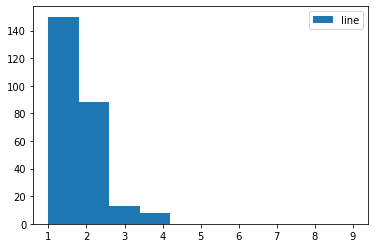

In [48]:
#plot histogram of interval lengths
plt.hist([all_intervals_on_landscape_connectivity(8,2,1,"mess")],range=[1,9],label=("line","gas"))
plt.legend()
plt.show()